In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import inspect

%matplotlib inline

sns.set_style("whitegrid")

In [2]:
df = pd.read_csv('default of credit card clients.csv', header=1, index_col=0)
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [3]:
# Check for any null values in the dataset.
# If df.isnull().values.any() returns False, then there are no null values.
df.isnull().values.any()

False

In [4]:
# Check the column names to identify the dependent and independent variables.
for column_name in df.columns:
    print(column_name)

LIMIT_BAL
SEX
EDUCATION
MARRIAGE
AGE
PAY_0
PAY_2
PAY_3
PAY_4
PAY_5
PAY_6
BILL_AMT1
BILL_AMT2
BILL_AMT3
BILL_AMT4
BILL_AMT5
BILL_AMT6
PAY_AMT1
PAY_AMT2
PAY_AMT3
PAY_AMT4
PAY_AMT5
PAY_AMT6
default payment next month


# Create functiond to inspect variables

In [5]:
def inspect_discrete_var(input_series=None, accepted_values_list=None):
    
    """ Docstring: inspect discrete variable
    
    The argument of the function "input_series" should be a pandas Series object.
    
    The function returns a pandas Styler object "output_styler".
    
    Rows for values not in accepted_values_list will be colored red.
    
    "output_styler" can be turned in to a Dataframe Object by calling
    the .data method (output_styler.data or inspect_discrete_var_2(arg).data).
    """
    
    try:
        temp = input_series.value_counts()
        temp.sort_index(ascending=True, inplace=True)
        temp.sort_index()
        temp.index.name = temp.name
        temp.rename('value_counts', inplace=True)
        n = len(input_series)
        temp_percent = temp / n
        temp_percent.rename('percentage', inplace=True)
        temp_percent
        temp_df = temp.to_frame().join(temp_percent.to_frame())
        
        temp_styler =  temp_df.style.format({'value_counts': '{:,}', 'percentage': '{:,.1%}'})

        styles = []
        
        try:

            for row, item in enumerate(temp_styler.index, start=0): 
                if item not in accepted_values_list:
                    styles.append({'selector': '.row'+str(row),
                                   'props': [('background-color', 'red'), 
                                             ('color', 'white'),
                                             ('font-weight', 'bold')]})
        except:
            pass                    
                    
        #return my_styles
        
        return temp_styler.set_table_styles(styles)
    except:
        # Return exception
        return None

In [6]:
def inspect_continuous_var(input_series=None):
    
    """ Docstring: inspect continuous variable
    
    The argument of the function "input_series" should be a pandas Series object.
    
    The function returns summary plots and summary statistics.
            
    """

    # Display boxplot and histogram/kde.
    f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(10, 5) )
    sns.boxplot(x=input_series, ax=ax1)
    sns.distplot(input_series, ax=ax2)
    font = {'weight' : 'bold',
            'size'   : 16}
    ax1.set_title(input_series.name, fontdict=font)
    plt.show()

    # Print summary statistics.
    print('Min: \t\t\t {:,.0f}'.format(input_series.min()))
    print('Lower Quartile: \t {:,.0f}'.format(input_series.quantile([.25]).iloc[0]))
    print('median: \t\t {:,.0f}'.format(input_series.median()))
    print('mean: \t\t\t {:,.0f}'.format(input_series.mean()))
    print('Upper Quartile: \t {:,.0f}'.format(input_series.quantile([.75]).iloc[0]))                                    
    print('max: \t\t\t {:,.0f}'.format(input_series.max()))
    print('\n')
    print('Skew: \t\t\t {:,.2f}'.format(input_series.skew()))
    print('Kurtosis: \t\t {:,.2f}'.format(input_series.kurtosis()))

    return None

In [7]:
def trim(x, trim_max=None, trim_min=None):
    """ Docstring: Trim outliers below trim_min or above trim_max.
    """
    if ((trim_max != None) & (trim_min != None)):
        if x > trim_max:
             return trim_max
        else:
            if x < trim_min:
                return trim_min
            else:
                return x
            
    elif (trim_max != None): 
        if x > trim_max:
             return trim_max
        else:
            return x

    elif (trim_min != None): 
        if x < trim_min:
             return trim_min
        else:
            return x
        
    else:
        return x

## Tasks:
Analyze (and wrangle) the  discrete variables first.

Then analyse (and wrangle) continuous variables.


### discrete variables: 

1. 'default payment next month';
2. 'SEX';
3. 'EDUCATION';
4. 'MARRIAGE';
5. 'PAY_0';
6. 'PAY_2';
7. 'PAY_3';
8. 'PAY_4';
9. 'PAY_5'; and 
10. 'PAY_6'.

### Continuous variables: 

1. 'LIMIT_BAL';
2. 'AGE';
3. 'BILL_AMT1';
4. 'BILL_AMT2';
5. 'BILL_AMT3';
6. 'BILL_AMT4';
7. 'BILL_AMT5';
8. 'BILL_AMT6';
9. 'PAY_AMT1';
10. 'PAY_AMT2';
11. 'PAY_AMT3';
12. 'PAY_AMT4';
13. 'PAY_AMT5'; and
14. 'PAY_AMT6'.

### discrete variables: 

In [8]:
# 1. 'default payment next month';

# 'default payment next month' is the dependent variable.
# It is a binary variable, that should take only two values (Yes = 1, No = 0).

df['default payment next month'].head()
input_series = df['default payment next month']
accepted_values_list = [0, 1]
inspect_discrete_var(input_series, accepted_values_list)

,value_counts,percentage
default payment next month,,
0,"23,364",77.9%
1,"6,636",22.1%


In [9]:
# The dependent variable ('default payment next month') is imbalanced.

# 77.9% of the observations do not default in the next month 
#    ('default payment next month' = 0).

# 22.1% of the observations do default in the next month 
#    ('default payment next month' = 1).

# The data set may need to be rebalanced / resampled.

In [10]:
# 2. 'SEX';

# X2: Gender (1 = male; 2 = female).
# DISCRETE

input_series = df['SEX']
accepted_values_list = [1, 2]
inspect_discrete_var(input_series, accepted_values_list)

,value_counts,percentage
SEX,,
1,"11,888",39.6%
2,"18,112",60.4%


In [11]:
# No data wrangling is needed for 'SEX'.

In [12]:
# 3. 'EDUCATION';

# X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
# DISCRETE

input_series = df['EDUCATION']
accepted_values_list = [1, 2, 3, 4]
inspect_discrete_var(input_series, accepted_values_list)

,value_counts,percentage
EDUCATION,,
0,14,0.0%
1,"10,585",35.3%
2,"14,030",46.8%
3,"4,917",16.4%
4,123,0.4%
5,280,0.9%
6,51,0.2%


Per https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset/discussion/34608 

The professor who created the data set said the following:

"X3: Education (1 = graduate school; 2 = university; 3 = high school; 0, 4, 5, 6 = others)."

Therefore, we will reassign 'EDUCATION' values not in [1, 2, 3, 4] to 4.

In [13]:
# Reassign 'EDUCATION' values not in [1, 2, 3, 4] to 4.

df_edited = df.copy()

accepted_values_list = [1, 2, 3, 4]

def reassign_EDUCATION(x):
    
    accepted_values_list = [1, 2, 3, 4]

    if x in accepted_values_list:
        output = x
    else:
        output = 4
        
    return output
        
df_edited = df.copy()

df_edited['EDUCATION'] = df_edited.EDUCATION.apply(reassign_EDUCATION)

input_series = df_edited['EDUCATION']
accepted_values_list = [1, 2, 3, 4]
inspect_discrete_var(input_series, accepted_values_list)

,value_counts,percentage
EDUCATION,,
1,"10,585",35.3%
2,"14,030",46.8%
3,"4,917",16.4%
4,468,1.6%


In [14]:
# 'EDUCATION' data has been wrangled.

In [15]:
# 4. 'MARRIAGE';

#Per https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset/discussion/34608 

# The professor who created the data set said the following:

#"X4: Marital status (1 = married; 2 = single; 3 = divorce; 0=others)."

# DISCRETE

input_series = df['MARRIAGE']
accepted_values_list = [0, 1, 2, 3]
inspect_discrete_var(input_series, accepted_values_list)

,value_counts,percentage
MARRIAGE,,
0,54,0.2%
1,"13,659",45.5%
2,"15,964",53.2%
3,323,1.1%


In [16]:
# No data wrangling is needed for 'MARRIAGE'.

'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', and 'PAY_6' are described as follows:

5. 'PAY_0';
6. 'PAY_2';
7. 'PAY_3';
8. 'PAY_4';
9. 'PAY_5'; and 
10. 'PAY_6'

X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is:

+ -2: No consumption; 
+ -1: Paid in full; 
+ 0: The use of revolving credit; 
+ 1 = payment delay for one month; 
+ 2 = payment delay for two months;
+ . . .; 
+ 8 = payment delay for eight months; 
+ 9 = payment delay for nine months and above.

[https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset/discussion/34608]

In [17]:
# For 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', and 'PAY_6',
# accepted values are [-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

accepted_values_list = list(range(-2, 10))
accepted_values_list

[-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [18]:
# 5. 'PAY_0';

# DISCRETE

input_series = df['PAY_0']
accepted_values_list = list(range(-2, 10))
inspect_discrete_var(input_series, accepted_values_list)

,value_counts,percentage
PAY_0,,
-2,"2,759",9.2%
-1,"5,686",19.0%
0,"14,737",49.1%
1,"3,688",12.3%
2,"2,667",8.9%
3,322,1.1%
4,76,0.3%
5,26,0.1%
6,11,0.0%


In [19]:
# No data wrangling is needed for 'PAY_0'.

In [20]:
# 6. 'PAY_2';

# DISCRETE

input_series = df['PAY_2']
accepted_values_list = list(range(-2, 10))
inspect_discrete_var(input_series, accepted_values_list)

,value_counts,percentage
PAY_2,,
-2,"3,782",12.6%
-1,"6,050",20.2%
0,"15,730",52.4%
1,28,0.1%
2,"3,927",13.1%
3,326,1.1%
4,99,0.3%
5,25,0.1%
6,12,0.0%


In [21]:
# No data wrangling is needed for 'PAY_2'.

In [22]:
# 7. 'PAY_3';

# DISCRETE

input_series = df['PAY_3']
accepted_values_list = list(range(-2, 10))
inspect_discrete_var(input_series, accepted_values_list)

,value_counts,percentage
PAY_3,,
-2,"4,085",13.6%
-1,"5,938",19.8%
0,"15,764",52.5%
1,4,0.0%
2,"3,819",12.7%
3,240,0.8%
4,76,0.3%
5,21,0.1%
6,23,0.1%


In [23]:
# No data wrangling is needed for 'PAY_3'.

In [24]:
# 8. 'PAY_4';

# DISCRETE

input_series = df['PAY_4']
accepted_values_list = list(range(-2, 10))
inspect_discrete_var(input_series, accepted_values_list)

,value_counts,percentage
PAY_4,,
-2,"4,348",14.5%
-1,"5,687",19.0%
0,"16,455",54.9%
1,2,0.0%
2,"3,159",10.5%
3,180,0.6%
4,69,0.2%
5,35,0.1%
6,5,0.0%


In [25]:
# No data wrangling is needed for 'PAY_4'.

In [26]:
# 9. 'PAY_5';

# DISCRETE

input_series = df['PAY_5']
accepted_values_list = list(range(-2, 10))
inspect_discrete_var(input_series, accepted_values_list)

,value_counts,percentage
PAY_5,,
-2,"4,546",15.2%
-1,"5,539",18.5%
0,"16,947",56.5%
2,"2,626",8.8%
3,178,0.6%
4,84,0.3%
5,17,0.1%
6,4,0.0%
7,58,0.2%


In [27]:
# No data wrangling is needed for 'PAY_5'.

In [28]:
# 10. 'PAY_6';

# DISCRETE

input_series = df['PAY_6']
accepted_values_list = list(range(-2, 10))
inspect_discrete_var(input_series, accepted_values_list)

,value_counts,percentage
PAY_6,,
-2,"4,895",16.3%
-1,"5,740",19.1%
0,"16,286",54.3%
2,"2,766",9.2%
3,184,0.6%
4,49,0.2%
5,13,0.0%
6,19,0.1%
7,46,0.2%


In [29]:
# No data wrangling is needed for 'PAY_6'.

In [30]:
# We relabel 'PAY_0' as 'PAY_1'.

df_edited.rename(columns={'PAY_0': 'PAY_1'}, inplace=True)
df_edited.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


### Continuous variables: 

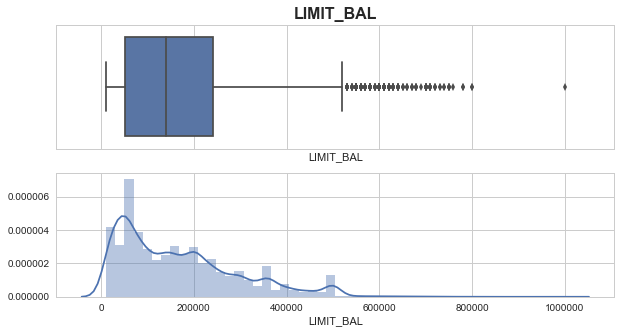

Min: 			 10,000
Lower Quartile: 	 50,000
median: 		 140,000
mean: 			 167,484
Upper Quartile: 	 240,000
max: 			 1,000,000


Skew: 			 0.99
Kurtosis: 		 0.54


In [31]:
# 1. 'LIMIT_BAL';

# X1: Amount of the given credit (NT dollar): 
# it includes both the individual consumer credit and his/her family (supplementary) credit.

# CONTINUOUS

input_series = df['LIMIT_BAL']
inspect_continuous_var(input_series)

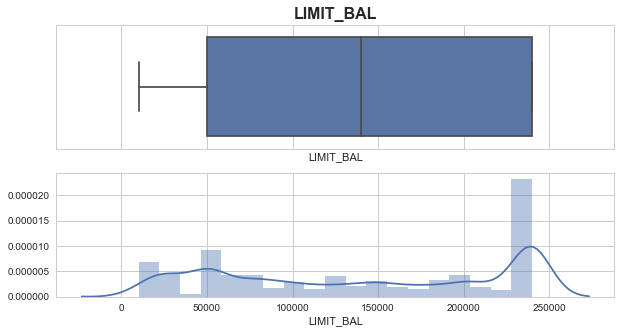

Min: 			 10,000
Lower Quartile: 	 50,000
median: 		 140,000
mean: 			 139,263
Upper Quartile: 	 240,000
max: 			 240,000


Skew: 			 -0.05
Kurtosis: 		 -1.55


In [32]:
# 'LIMIT_BAL' has high kurtosis and is highly skewed. 
# We will create a second edited data set
# in which we trim outliers.

df_edited_trimmed = df_edited.copy()

trim_max = df_edited_trimmed.LIMIT_BAL.quantile(.75)
df_edited_trimmed.LIMIT_BAL = df_edited_trimmed.LIMIT_BAL.apply(trim, 
                                                                trim_max=trim_max)

input_series = df_edited_trimmed.LIMIT_BAL
inspect_continuous_var(input_series)

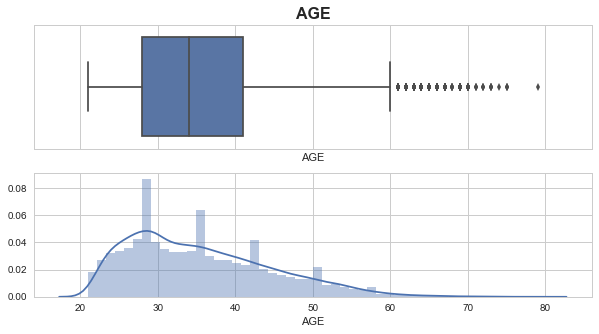

Min: 			 21
Lower Quartile: 	 28
median: 		 34
mean: 			 35
Upper Quartile: 	 41
max: 			 79


Skew: 			 0.73
Kurtosis: 		 0.04


In [33]:
# 2. 'AGE';

# X5: Age (year).

# CONTINUOUS

input_series = df['AGE']
inspect_continuous_var(input_series)

In [34]:
# No data wrangling is needed for 'AGE'.

'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', and 'BILL_AMT6' are described as follows:

    
3. 'BILL_AMT1';
4. 'BILL_AMT2';
5. 'BILL_AMT3';
6. 'BILL_AMT4';
7. 'BILL_AMT5'; and
8. 'BILL_AMT6'.   


X12-X17: Amount of bill statement (NT dollar). 
+ X12 = amount of bill statement in September, 2005; 
+ X13 = amount of bill statement in August, 2005; 
+ . . .; 
+ X17 = amount of bill statement in April, 2005.

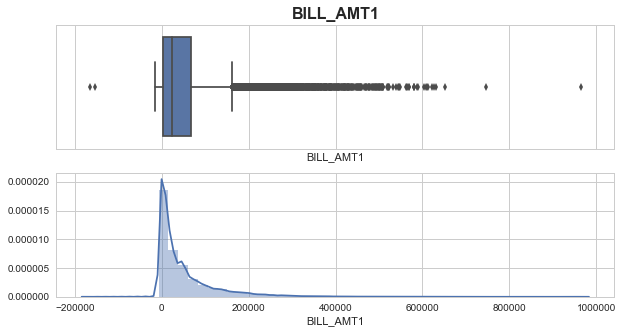

Min: 			 -165,580
Lower Quartile: 	 3,559
median: 		 22,382
mean: 			 51,223
Upper Quartile: 	 67,091
max: 			 964,511


Skew: 			 2.66
Kurtosis: 		 9.81


In [35]:
# 3. 'BILL_AMT1';

# X12 = amount of bill statement in September, 2005; 

# CONTINUOUS

input_series = df['BILL_AMT1']
inspect_continuous_var(input_series)

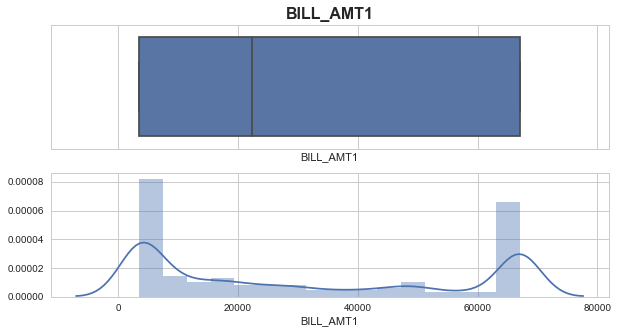

Min: 			 3,559
Lower Quartile: 	 3,559
median: 		 22,382
mean: 			 31,042
Upper Quartile: 	 67,090
max: 			 67,091


Skew: 			 0.33
Kurtosis: 		 -1.58


In [36]:
# 'BILL_AMT1' has high kurtosis and is highly skewed. 
# We will trim these outliers in df_edited_trimmed.

trim_max = df_edited_trimmed.BILL_AMT1.quantile(.75)
trim_min = df_edited_trimmed.BILL_AMT1.quantile(.25)
df_edited_trimmed.BILL_AMT1 = df_edited_trimmed.BILL_AMT1.apply(trim, 
                                                                trim_max=trim_max,
                                                                trim_min=trim_min)

input_series = df_edited_trimmed.BILL_AMT1
inspect_continuous_var(input_series)

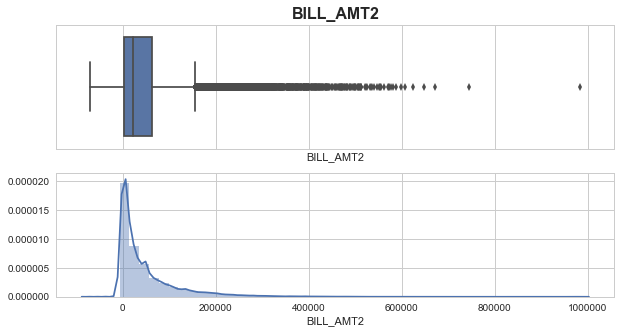

Min: 			 -69,777
Lower Quartile: 	 2,985
median: 		 21,200
mean: 			 49,179
Upper Quartile: 	 64,006
max: 			 983,931


Skew: 			 2.71
Kurtosis: 		 10.30


In [37]:
# 4. 'BILL_AMT2';

# X13 = amount of bill statement in August, 2005; 

# CONTINUOUS

input_series = df['BILL_AMT2']
inspect_continuous_var(input_series)

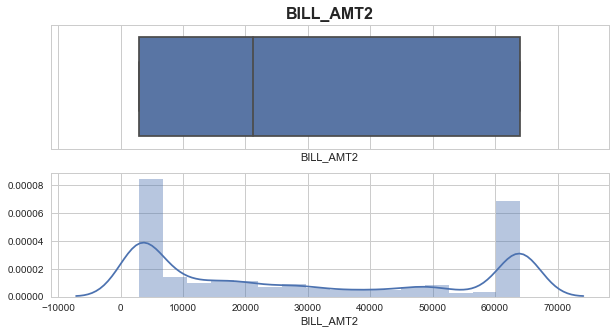

Min: 			 2,985
Lower Quartile: 	 2,985
median: 		 21,200
mean: 			 29,546
Upper Quartile: 	 64,005
max: 			 64,006


Skew: 			 0.32
Kurtosis: 		 -1.58


In [38]:
# 'BILL_AMT2' has high kurtosis and is highly skewed. 
# We will trim these outliers in df_edited_trimmed.

trim_max = df_edited_trimmed.BILL_AMT2.quantile(.75)
trim_min = df_edited_trimmed.BILL_AMT2.quantile(.25)
df_edited_trimmed.BILL_AMT2 = df_edited_trimmed.BILL_AMT2.apply(trim, 
                                                                trim_max=trim_max,
                                                                trim_min=trim_min)

input_series = df_edited_trimmed.BILL_AMT2
inspect_continuous_var(input_series)

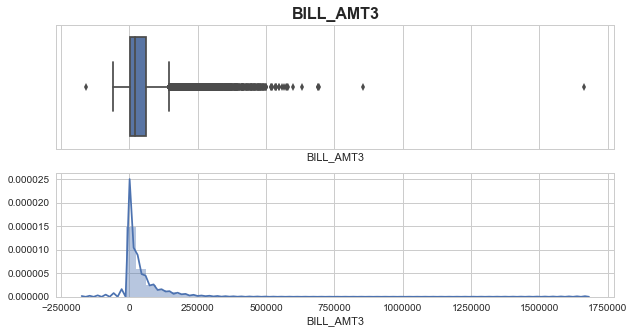

Min: 			 -157,264
Lower Quartile: 	 2,666
median: 		 20,088
mean: 			 47,013
Upper Quartile: 	 60,165
max: 			 1,664,089


Skew: 			 3.09
Kurtosis: 		 19.78


In [39]:
# 5. 'BILL_AMT3';

# X14 = amount of bill statement in July, 2005; 

# CONTINUOUS

input_series = df['BILL_AMT3']
inspect_continuous_var(input_series)

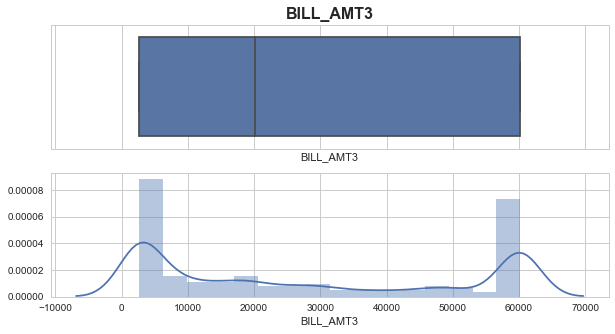

Min: 			 2,666
Lower Quartile: 	 2,667
median: 		 20,088
mean: 			 27,782
Upper Quartile: 	 60,164
max: 			 60,165


Skew: 			 0.32
Kurtosis: 		 -1.58


In [40]:
# 'BILL_AMT3' has high kurtosis and is highly skewed. 
# We will trim these outliers in df_edited_trimmed.

trim_max = df_edited_trimmed.BILL_AMT3.quantile(.75)
trim_min = df_edited_trimmed.BILL_AMT3.quantile(.25)
df_edited_trimmed.BILL_AMT3 = df_edited_trimmed.BILL_AMT3.apply(trim, 
                                                                trim_max=trim_max,
                                                                trim_min=trim_min)

input_series = df_edited_trimmed.BILL_AMT3
inspect_continuous_var(input_series)

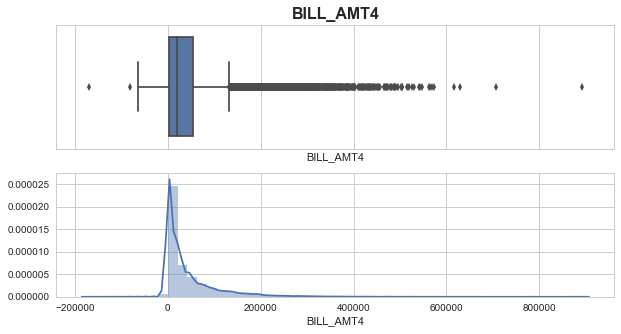

Min: 			 -170,000
Lower Quartile: 	 2,327
median: 		 19,052
mean: 			 43,263
Upper Quartile: 	 54,506
max: 			 891,586


Skew: 			 2.82
Kurtosis: 		 11.31


In [41]:
# 6. 'BILL_AMT4';

# X15 = amount of bill statement in June, 2005; 

# CONTINUOUS

input_series = df['BILL_AMT4']
inspect_continuous_var(input_series)

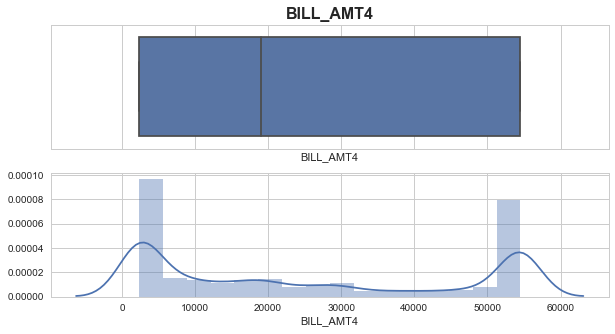

Min: 			 2,327
Lower Quartile: 	 2,327
median: 		 19,052
mean: 			 25,075
Upper Quartile: 	 54,504
max: 			 54,506


Skew: 			 0.33
Kurtosis: 		 -1.56


In [42]:
# 'BILL_AMT4' has high kurtosis and is highly skewed. 
# We will trim these outliers in df_edited_trimmed.

trim_max = df_edited_trimmed.BILL_AMT4.quantile(.75)
trim_min = df_edited_trimmed.BILL_AMT4.quantile(.25)
df_edited_trimmed.BILL_AMT4 = df_edited_trimmed.BILL_AMT4.apply(trim, 
                                                                trim_max=trim_max,
                                                                trim_min=trim_min)

input_series = df_edited_trimmed.BILL_AMT4
inspect_continuous_var(input_series)

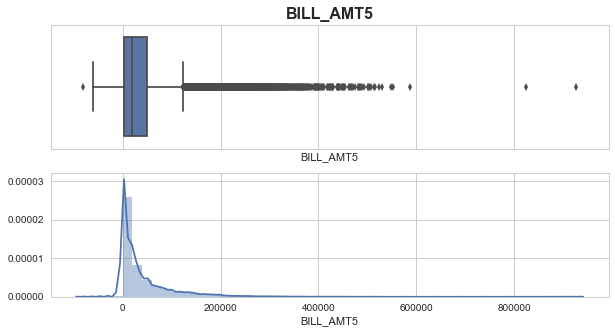

Min: 			 -81,334
Lower Quartile: 	 1,763
median: 		 18,104
mean: 			 40,311
Upper Quartile: 	 50,190
max: 			 927,171


Skew: 			 2.88
Kurtosis: 		 12.31


In [43]:
# 7. 'BILL_AMT5';

# X16 = amount of bill statement in May, 2005; 

# CONTINUOUS

input_series = df['BILL_AMT5']
inspect_continuous_var(input_series)

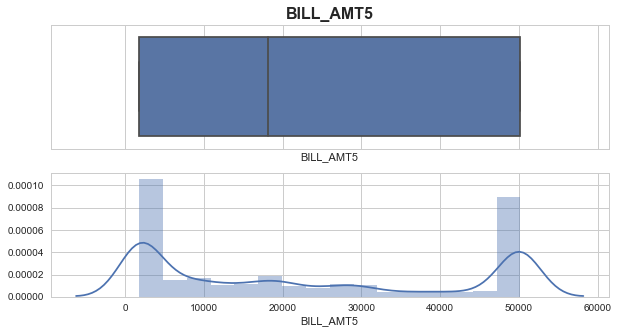

Min: 			 1,763
Lower Quartile: 	 1,763
median: 		 18,104
mean: 			 22,860
Upper Quartile: 	 50,186
max: 			 50,190


Skew: 			 0.34
Kurtosis: 		 -1.55


In [44]:
# 'BILL_AMT5' has high kurtosis and is highly skewed. 
# We will trim these outliers in df_edited_trimmed.

trim_max = df_edited_trimmed.BILL_AMT5.quantile(.75)
trim_min = df_edited_trimmed.BILL_AMT5.quantile(.25)
df_edited_trimmed.BILL_AMT5 = df_edited_trimmed.BILL_AMT5.apply(trim, 
                                                                trim_max=trim_max,
                                                                trim_min=trim_min)

input_series = df_edited_trimmed.BILL_AMT5
inspect_continuous_var(input_series)

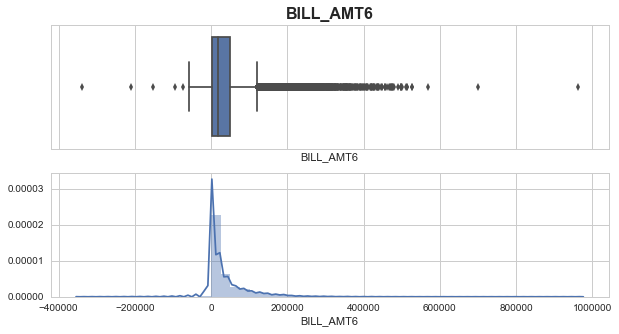

Min: 			 -339,603
Lower Quartile: 	 1,256
median: 		 17,071
mean: 			 38,872
Upper Quartile: 	 49,198
max: 			 961,664


Skew: 			 2.85
Kurtosis: 		 12.27


In [45]:
# 8. 'BILL_AMT6';

# X17 = amount of bill statement in April, 2005; 

# CONTINUOUS

input_series = df['BILL_AMT6']
inspect_continuous_var(input_series)

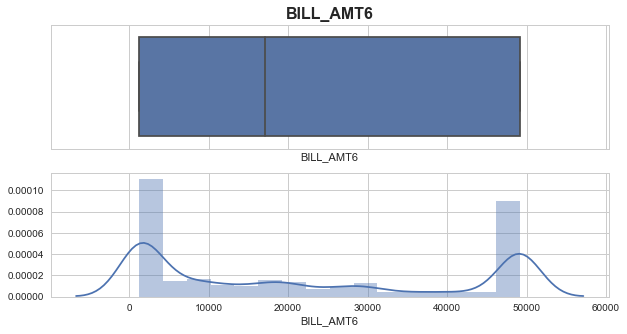

Min: 			 1,256
Lower Quartile: 	 1,256
median: 		 17,071
mean: 			 21,879
Upper Quartile: 	 49,197
max: 			 49,198


Skew: 			 0.35
Kurtosis: 		 -1.54


In [46]:
# 'BILL_AMT6' has high kurtosis and is highly skewed. 
# We will trim these outliers in df_edited_trimmed.

trim_max = df_edited_trimmed.BILL_AMT6.quantile(.75)
trim_min = df_edited_trimmed.BILL_AMT6.quantile(.25)
df_edited_trimmed.BILL_AMT6 = df_edited_trimmed.BILL_AMT6.apply(trim, 
                                                                trim_max=trim_max,
                                                                trim_min=trim_min)

input_series = df_edited_trimmed.BILL_AMT6
inspect_continuous_var(input_series)

'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', and 'PAY_AMT6' are described as follows:
    
9. 'PAY_AMT1';
10. 'PAY_AMT2';
11. 'PAY_AMT3';
12. 'PAY_AMT4';
13. 'PAY_AMT5'; and
14. 'PAY_AMT6'.

X18-X23: Amount of previous payment (NT dollar). 
+ X18 = amount paid in September, 2005; 
+ X19 = amount paid in August, 2005; 
+ . . .;
+ X23 = amount paid in April, 2005. 

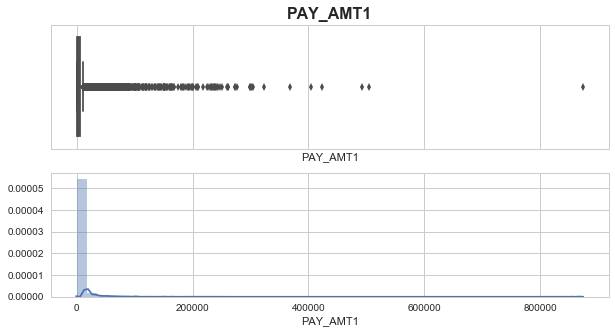

Min: 			 0
Lower Quartile: 	 1,000
median: 		 2,100
mean: 			 5,664
Upper Quartile: 	 5,006
max: 			 873,552


Skew: 			 14.67
Kurtosis: 		 415.25


In [47]:
# 9. 'PAY_AMT1';

# X18 = amount paid in September, 2005; 

# CONTINUOUS

input_series = df['PAY_AMT1']
inspect_continuous_var(input_series)

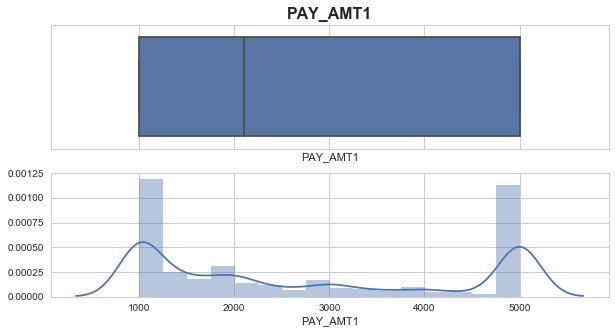

Min: 			 1,000
Lower Quartile: 	 1,000
median: 		 2,100
mean: 			 2,764
Upper Quartile: 	 5,006
max: 			 5,006


Skew: 			 0.33
Kurtosis: 		 -1.57


In [48]:
# 'PAY_AMT1' has high kurtosis and is highly skewed. 
# We will trim these outliers in df_edited_trimmed.

trim_max = df_edited_trimmed.PAY_AMT1.quantile(.75)
trim_min = df_edited_trimmed.PAY_AMT1.quantile(.25)
df_edited_trimmed.PAY_AMT1 = df_edited_trimmed.PAY_AMT1.apply(trim, 
                                                                trim_max=trim_max,
                                                                trim_min=trim_min)

input_series = df_edited_trimmed.PAY_AMT1
inspect_continuous_var(input_series)

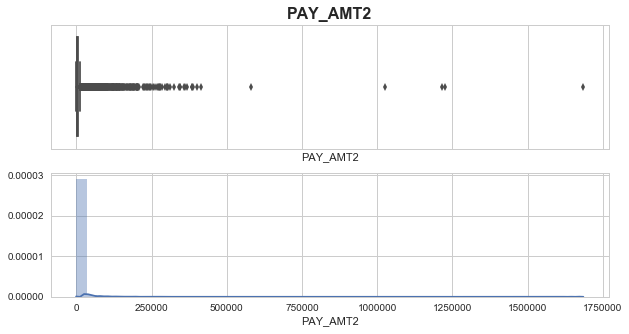

Min: 			 0
Lower Quartile: 	 833
median: 		 2,009
mean: 			 5,921
Upper Quartile: 	 5,000
max: 			 1,684,259


Skew: 			 30.45
Kurtosis: 		 1,641.63


In [49]:
# 10. 'PAY_AMT2';

# X19 = amount paid in August, 2005; 

# CONTINUOUS

input_series = df['PAY_AMT2']
inspect_continuous_var(input_series)

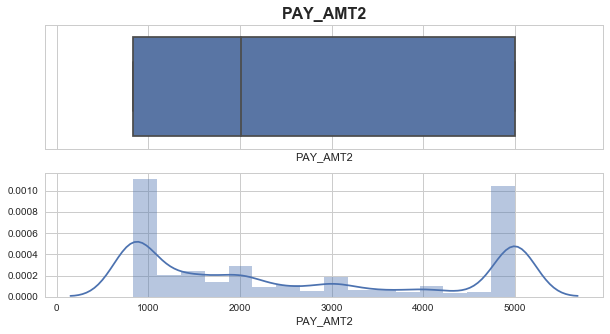

Min: 			 833
Lower Quartile: 	 833
median: 		 2,009
mean: 			 2,658
Upper Quartile: 	 5,000
max: 			 5,000


Skew: 			 0.35
Kurtosis: 		 -1.53


In [50]:
# 'PAY_AMT2' has high kurtosis and is highly skewed. 
# We will trim these outliers in df_edited_trimmed.

trim_max = df_edited_trimmed.PAY_AMT2.quantile(.75)
trim_min = df_edited_trimmed.PAY_AMT2.quantile(.25)
df_edited_trimmed.PAY_AMT2 = df_edited_trimmed.PAY_AMT2.apply(trim, 
                                                                trim_max=trim_max,
                                                                trim_min=trim_min)

input_series = df_edited_trimmed.PAY_AMT2
inspect_continuous_var(input_series)

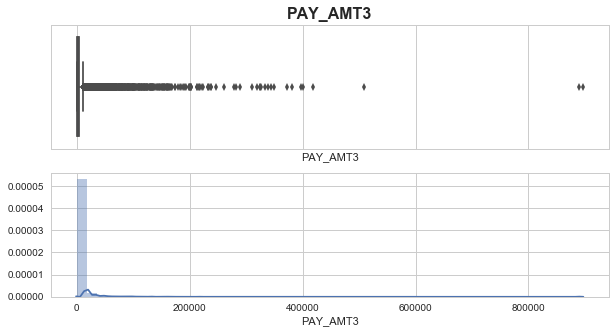

Min: 			 0
Lower Quartile: 	 390
median: 		 1,800
mean: 			 5,226
Upper Quartile: 	 4,505
max: 			 896,040


Skew: 			 17.22
Kurtosis: 		 564.31


In [51]:
# 11. 'PAY_AMT3';

# X20 = amount paid in July, 2005; 

# CONTINUOUS

input_series = df['PAY_AMT3']
inspect_continuous_var(input_series)

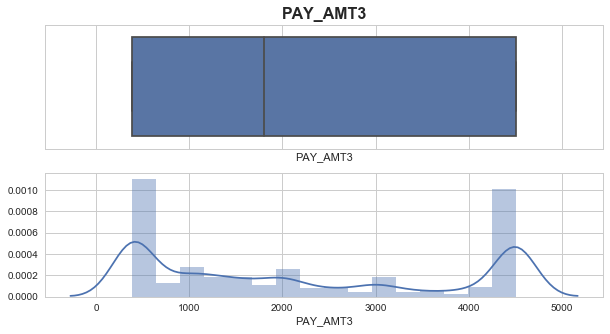

Min: 			 390
Lower Quartile: 	 390
median: 		 1,800
mean: 			 2,212
Upper Quartile: 	 4,505
max: 			 4,505


Skew: 			 0.32
Kurtosis: 		 -1.52


In [52]:
# 'PAY_AMT3' has high kurtosis and is highly skewed. 
# We will trim these outliers in df_edited_trimmed.

trim_max = df_edited_trimmed.PAY_AMT3.quantile(.75)
trim_min = df_edited_trimmed.PAY_AMT3.quantile(.25)
df_edited_trimmed.PAY_AMT3 = df_edited_trimmed.PAY_AMT3.apply(trim, 
                                                                trim_max=trim_max,
                                                                trim_min=trim_min)

input_series = df_edited_trimmed.PAY_AMT3
inspect_continuous_var(input_series)

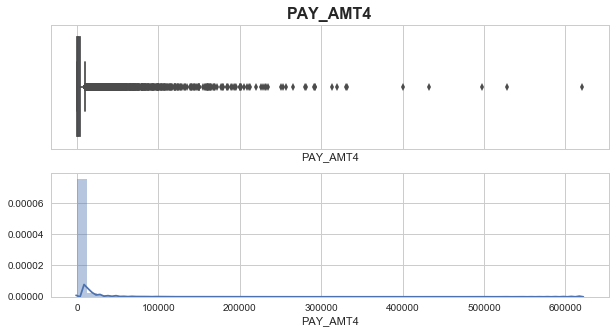

Min: 			 0
Lower Quartile: 	 296
median: 		 1,500
mean: 			 4,826
Upper Quartile: 	 4,013
max: 			 621,000


Skew: 			 12.90
Kurtosis: 		 277.33


In [53]:
# 12. 'PAY_AMT4';

# X21 = amount paid in June, 2005; 

# CONTINUOUS

input_series = df['PAY_AMT4']
inspect_continuous_var(input_series)

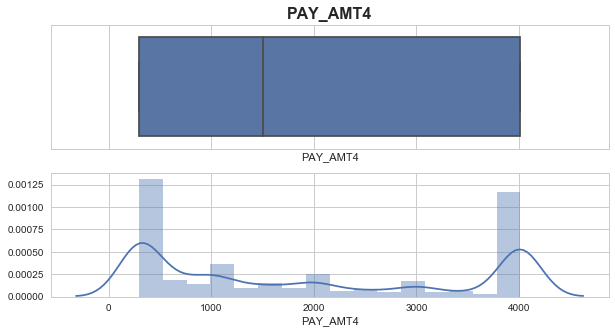

Min: 			 296
Lower Quartile: 	 296
median: 		 1,500
mean: 			 1,937
Upper Quartile: 	 4,013
max: 			 4,013


Skew: 			 0.31
Kurtosis: 		 -1.56


In [54]:
# 'PAY_AMT4' has high kurtosis and is highly skewed. 
# We will trim these outliers in df_edited_trimmed.

trim_max = df_edited_trimmed.PAY_AMT4.quantile(.75)
trim_min = df_edited_trimmed.PAY_AMT4.quantile(.25)
df_edited_trimmed.PAY_AMT4 = df_edited_trimmed.PAY_AMT4.apply(trim, 
                                                                trim_max=trim_max,
                                                                trim_min=trim_min)

input_series = df_edited_trimmed.PAY_AMT4
inspect_continuous_var(input_series)

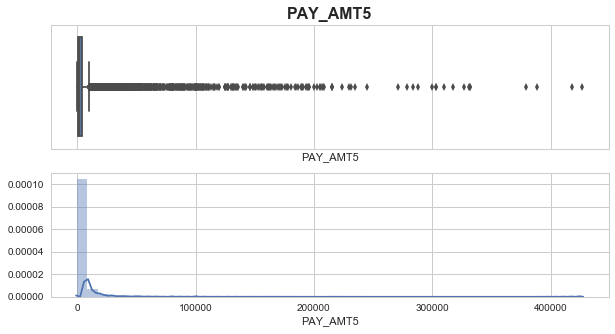

Min: 			 0
Lower Quartile: 	 252
median: 		 1,500
mean: 			 4,799
Upper Quartile: 	 4,032
max: 			 426,529


Skew: 			 11.13
Kurtosis: 		 180.06


In [55]:
# 13. 'PAY_AMT5';

# X22 = amount paid in May, 2005; 

# CONTINUOUS

input_series = df['PAY_AMT5']
inspect_continuous_var(input_series)

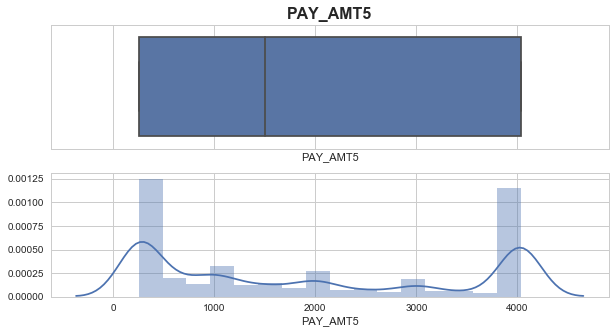

Min: 			 252
Lower Quartile: 	 253
median: 		 1,500
mean: 			 1,936
Upper Quartile: 	 4,031
max: 			 4,032


Skew: 			 0.30
Kurtosis: 		 -1.56


In [56]:
# 'PAY_AMT5' has high kurtosis and is highly skewed. 
# We will trim these outliers in df_edited_trimmed.

trim_max = df_edited_trimmed.PAY_AMT5.quantile(.75)
trim_min = df_edited_trimmed.PAY_AMT5.quantile(.25)
df_edited_trimmed.PAY_AMT5 = df_edited_trimmed.PAY_AMT5.apply(trim, 
                                                                trim_max=trim_max,
                                                                trim_min=trim_min)

input_series = df_edited_trimmed.PAY_AMT5
inspect_continuous_var(input_series)

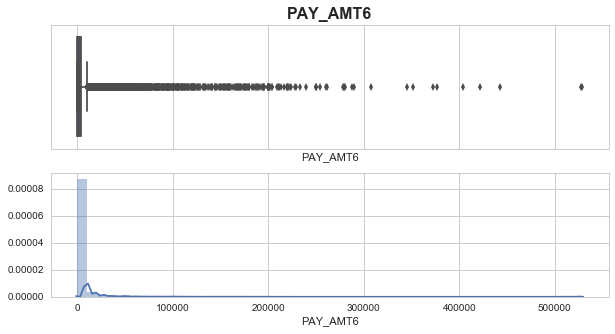

Min: 			 0
Lower Quartile: 	 118
median: 		 1,500
mean: 			 5,216
Upper Quartile: 	 4,000
max: 			 528,666


Skew: 			 10.64
Kurtosis: 		 167.16


In [57]:
# 14. 'PAY_AMT6'.

# X23 = amount paid in April, 2005; 

# CONTINUOUS

input_series = df['PAY_AMT6']
inspect_continuous_var(input_series)

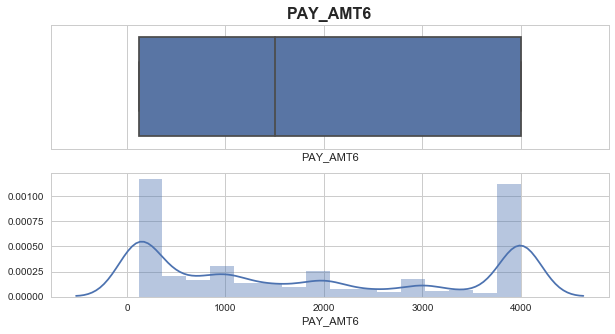

Min: 			 118
Lower Quartile: 	 118
median: 		 1,500
mean: 			 1,873
Upper Quartile: 	 4,000
max: 			 4,000


Skew: 			 0.27
Kurtosis: 		 -1.57


In [58]:
# 'PAY_AMT6' has high kurtosis and is highly skewed. 
# We will trim these outliers in df_edited_trimmed.

trim_max = df_edited_trimmed.PAY_AMT6.quantile(.75)
trim_min = df_edited_trimmed.PAY_AMT6.quantile(.25)
df_edited_trimmed.PAY_AMT6 = df_edited_trimmed.PAY_AMT6.apply(trim, 
                                                                trim_max=trim_max,
                                                                trim_min=trim_min)

input_series = df_edited_trimmed.PAY_AMT6
inspect_continuous_var(input_series)

## Export edited DataFrame to new csv file

In [59]:
temp_df = pd.read_csv('default of credit card clients.csv')
header_list = list(temp_df.columns)
header_list[0] = ''

df_edited_2 = df_edited.copy()
df_edited_2.reset_index(inplace=True)

arrays = [header_list, list(df_edited_2.columns)]
df_edited_2.columns = arrays

df_edited_2.to_csv('default of credit card clients - wrangled.csv', index=False)

In [60]:
temp_df = pd.read_csv('default of credit card clients.csv')
header_list = list(temp_df.columns)
header_list[0] = ''

df_edited_trimmed_2 = df_edited_trimmed.copy()
df_edited_trimmed_2.reset_index(inplace=True)

arrays = [header_list, list(df_edited_trimmed_2.columns)]
df_edited_trimmed_2.columns = arrays

df_edited_trimmed_2.to_csv('default of credit card clients - wrangled - trimmed.csv', index=False)

# Execute our .py file to wrangle data and export csv

In [61]:
%run data_cleaning-default_of_credit_card_clients.py